## Rotulagem dos dados

In [5]:
# ! python3 -m pip install wordcloud

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import stop_words
from wordcloud import WordCloud
from operator import itemgetter

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-7-91fee3fe36c8>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [9]:
refined = f'../Datalake/Refined'
df = pd.read_csv(f'{refined}/review_store.csv', decimal=",")

In [5]:
df = pd.read_csv(f'data_full_{folder}.csv')

In [11]:
df.head()

,date,version,author,rating,review,os,review_cleaned,review_stop_word,review_tokenized,review_stemming,review_lematized
0,2018-11-02,NaN,NaN,1,Vendem e não entregam,android,vendem e nao entregam,vendem nao entregam,"['vendem', 'nao', 'entregam']","['vend', 'nao', 'entreg']","['vendem', 'nao', 'entregam']"
1,2018-11-02,NaN,Lay Botelho,2,"Pedido sempre atrasa mto, o app.ta horrível, nunca manda o código de atualização...precisa melhorar mto ainda!",android,pedido sempre atrasa mto o appta horrivel nunca manda o codigo de atualizacaoprecisa melhorar mto ainda,pedido sempre atrasa mto appta horrivel nunca manda codigo atualizacaoprecisa melhorar mto ainda,"['pedido', 'sempre', 'atrasa', 'mto', 'appta', 'horrivel', 'nunca', 'manda', 'codigo', 'atualizacaoprecisa', 'melhorar', 'mto', 'ainda']","['ped', 'sempr', 'atras', 'mto', 'appta', 'horrivel', 'nunc', 'mand', 'codig', 'atualizacaoprecis', 'melhor', 'mto', 'aind']","['pedido', 'sempre', 'atrasa', 'mto', 'appta', 'horrivel', 'nunca', 'manda', 'codigo', 'atualizacaoprecisa', 'melhorar', 'mto', 'ainda']"
2,2018-11-03,NaN,Osmani Eletricista,1,"Mais uma vez tentei fazer o pedido e da erro, o estranho que fiz uma outra conta com os dados da minha esposa e sem aplicar cupons aceita normal",android,mais uma vez tentei fazer o pedido e da erro o estranho que fiz uma outra conta com os dados da minha esposa e sem aplicar cupons aceita normal,vez tentei fazer pedido erro estranho fiz outra conta dados esposa aplicar cupons aceita normal,"['vez', 'tentei', 'fazer', 'pedido', 'erro', 'estranho', 'fiz', 'outra', 'conta', 'dados', 'esposa', 'aplicar', 'cupons', 'aceita', 'normal']","['vez', 'tent', 'faz', 'ped', 'erro', 'estranh', 'fiz', 'outr', 'cont', 'dad', 'espos', 'aplic', 'cupons', 'aceit', 'normal']","['vez', 'tentei', 'fazer', 'pedido', 'erro', 'estranho', 'fiz', 'outra', 'conta', 'dado', 'esposa', 'aplicar', 'cupons', 'aceita', 'normal']"
3,2018-11-03,NaN,Geraldo Gomes,1,Vou abrir o carrinho e o App fecha sozinho,android,vou abrir o carrinho e o app fecha sozinho,vou abrir carrinho app fecha sozinho,"['vou', 'abrir', 'carrinho', 'app', 'fecha', 'sozinho']","['vou', 'abrir', 'carrinh', 'app', 'fech', 'sozinh']","['vou', 'abrir', 'carrinho', 'app', 'fecha', 'sozinho']"
4,2018-11-03,NaN,thiago martins,1,Não tem método de pagamento online isso é um grande problema ao meu ver vou continuar com ifood,android,nao tem metodo de pagamento online isso e um grande problema ao meu ver vou continuar com ifood,nao metodo pagamento online grande problema ver vou continuar ifood,"['nao', 'metodo', 'pagamento', 'online', 'grande', 'problema', 'ver', 'vou', 'continuar', 'ifood']","['nao', 'metod', 'pagament', 'onlin', 'grand', 'problem', 'ver', 'vou', 'continu', 'ifood']","['nao', 'metodo', 'pagamento', 'online', 'grande', 'problema', 'ver', 'vou', 'continuar', 'ifood']"


In [21]:
df.shape

(8926, 11)

In [49]:
df = df[df.author.notna()]
df = df[df.review_stop_word.notna()]
df = df[df.review_cleaned.notna()]

In [50]:
df['category'] = 'Outro'
df = df[df['author'].notna()]
df.shape

(8841, 13)

In [51]:
df.head()

,date,version,author,rating,review,os,review_cleaned,review_stop_word,review_tokenized,review_stemming,review_lematized,category,cluster
1,2018-11-02,NaN,Lay Botelho,2,"Pedido sempre atrasa mto, o app.ta horrível, nunca manda o código de atualização...precisa melhorar mto ainda!",android,pedido sempre atrasa mto o appta horrivel nunca manda o codigo de atualizacaoprecisa melhorar mto ainda,pedido sempre atrasa mto appta horrivel nunca manda codigo atualizacaoprecisa melhorar mto ainda,"['pedido', 'sempre', 'atrasa', 'mto', 'appta', 'horrivel', 'nunca', 'manda', 'codigo', 'atualizacaoprecisa', 'melhorar', 'mto', 'ainda']","['ped', 'sempr', 'atras', 'mto', 'appta', 'horrivel', 'nunc', 'mand', 'codig', 'atualizacaoprecis', 'melhor', 'mto', 'aind']","['pedido', 'sempre', 'atrasa', 'mto', 'appta', 'horrivel', 'nunca', 'manda', 'codigo', 'atualizacaoprecisa', 'melhorar', 'mto', 'ainda']",Outro,24
2,2018-11-03,NaN,Osmani Eletricista,1,"Mais uma vez tentei fazer o pedido e da erro, o estranho que fiz uma outra conta com os dados da minha esposa e sem aplicar cupons aceita normal",android,mais uma vez tentei fazer o pedido e da erro o estranho que fiz uma outra conta com os dados da minha esposa e sem aplicar cupons aceita normal,vez tentei fazer pedido erro estranho fiz outra conta dados esposa aplicar cupons aceita normal,"['vez', 'tentei', 'fazer', 'pedido', 'erro', 'estranho', 'fiz', 'outra', 'conta', 'dados', 'esposa', 'aplicar', 'cupons', 'aceita', 'normal']","['vez', 'tent', 'faz', 'ped', 'erro', 'estranh', 'fiz', 'outr', 'cont', 'dad', 'espos', 'aplic', 'cupons', 'aceit', 'normal']","['vez', 'tentei', 'fazer', 'pedido', 'erro', 'estranho', 'fiz', 'outra', 'conta', 'dado', 'esposa', 'aplicar', 'cupons', 'aceita', 'normal']",Outro,9
3,2018-11-03,NaN,Geraldo Gomes,1,Vou abrir o carrinho e o App fecha sozinho,android,vou abrir o carrinho e o app fecha sozinho,vou abrir carrinho app fecha sozinho,"['vou', 'abrir', 'carrinho', 'app', 'fecha', 'sozinho']","['vou', 'abrir', 'carrinh', 'app', 'fech', 'sozinh']","['vou', 'abrir', 'carrinho', 'app', 'fecha', 'sozinho']",Outro,23
4,2018-11-03,NaN,thiago martins,1,Não tem método de pagamento online isso é um grande problema ao meu ver vou continuar com ifood,android,nao tem metodo de pagamento online isso e um grande problema ao meu ver vou continuar com ifood,nao metodo pagamento online grande problema ver vou continuar ifood,"['nao', 'metodo', 'pagamento', 'online', 'grande', 'problema', 'ver', 'vou', 'continuar', 'ifood']","['nao', 'metod', 'pagament', 'onlin', 'grand', 'problem', 'ver', 'vou', 'continu', 'ifood']","['nao', 'metodo', 'pagamento', 'online', 'grande', 'problema', 'ver', 'vou', 'continuar', 'ifood']",Outro,22
5,2018-11-04,NaN,alyson zanardi,1,Nada haver . mostra algumas cervejas porem bem caras e fala que tá fechado no momento . Não tem nem como comprar nada .,android,nada haver mostra algumas cervejas porem bem caras e fala que ta fechado no momento nao tem nem como comprar nada,nada haver mostra algumas cervejas porem bem caras fala ta fechado momento nao comprar nada,"['nada', 'haver', 'mostra', 'algumas', 'cervejas', 'porem', 'bem', 'caras', 'fala', 'ta', 'fechado', 'momento', 'nao', 'comprar', 'nada']","['nad', 'hav', 'mostr', 'algum', 'cervej', 'por', 'bem', 'car', 'fal', 'ta', 'fech', 'moment', 'nao', 'compr', 'nad']","['nada', 'haver', 'mostra', 'algumas', 'cervejas', 'porem', 'bem', 'caras', 'fala', 'ta', 'fechado', 'momento', 'nao', 'comprar', 'nada']",Outro,16


## Função de agrupamento

In [52]:
def pooler(documents, iters, min_df=5, max_df=0.7, ngram=(1, 3), max_features=1000):
    # documents vectorizer
    vectorizer = TfidfVectorizer(
        min_df=min_df,
        max_df=max_df,
        ngram_range=ngram,
        max_features=max_features
    ).fit(documents)
    vectorized = vectorizer.transform(documents)
    
    # pooler model
    sse = []
    models = []
    for k in iters:
        model = MiniBatchKMeans(n_clusters=k, init_size=256, batch_size=512, random_state=42).fit(vectorized)
        models.append(model)
        sse.append(model.inertia_)
        model.predict(vectorized)
        
    return models, sse, vectorized, vectorizer.get_feature_names()

def get_model(models, k):
    c = ((k - 2) // 2)
    return models[c]

## Avaliando agrupamento

In [28]:
df.columns.values

array(['date', 'version', 'author', 'rating', 'review', 'os',
       'review_cleaned', 'review_stop_word', 'review_tokenized',
       'review_stemming', 'review_lematized', 'category'], dtype=object)

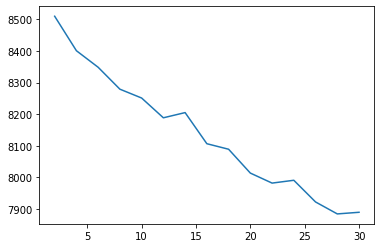

In [60]:
iters = range(2, 30 + 1, 2)
models, sse, vectorized, vocabulary = pooler(df.review_lematized.values, iters, min_df=5, max_df=0.6, max_features=1500)

plt.plot(iters, sse)
plt.show()

## Agrupando comentários

In [62]:
k = 14
model = get_model(models, k)
model.predict(vectorized)

df['cluster'] = model.predict(vectorized)
df.head()

,date,version,author,rating,review,os,review_cleaned,review_stop_word,review_tokenized,review_stemming,review_lematized,category,cluster
1,2018-11-02,NaN,Lay Botelho,2,"Pedido sempre atrasa mto, o app.ta horrível, nunca manda o código de atualização...precisa melhorar mto ainda!",android,pedido sempre atrasa mto o appta horrivel nunca manda o codigo de atualizacaoprecisa melhorar mto ainda,pedido sempre atrasa mto appta horrivel nunca manda codigo atualizacaoprecisa melhorar mto ainda,"['pedido', 'sempre', 'atrasa', 'mto', 'appta', 'horrivel', 'nunca', 'manda', 'codigo', 'atualizacaoprecisa', 'melhorar', 'mto', 'ainda']","['ped', 'sempr', 'atras', 'mto', 'appta', 'horrivel', 'nunc', 'mand', 'codig', 'atualizacaoprecis', 'melhor', 'mto', 'aind']","['pedido', 'sempre', 'atrasa', 'mto', 'appta', 'horrivel', 'nunca', 'manda', 'codigo', 'atualizacaoprecisa', 'melhorar', 'mto', 'ainda']",Outro,7
2,2018-11-03,NaN,Osmani Eletricista,1,"Mais uma vez tentei fazer o pedido e da erro, o estranho que fiz uma outra conta com os dados da minha esposa e sem aplicar cupons aceita normal",android,mais uma vez tentei fazer o pedido e da erro o estranho que fiz uma outra conta com os dados da minha esposa e sem aplicar cupons aceita normal,vez tentei fazer pedido erro estranho fiz outra conta dados esposa aplicar cupons aceita normal,"['vez', 'tentei', 'fazer', 'pedido', 'erro', 'estranho', 'fiz', 'outra', 'conta', 'dados', 'esposa', 'aplicar', 'cupons', 'aceita', 'normal']","['vez', 'tent', 'faz', 'ped', 'erro', 'estranh', 'fiz', 'outr', 'cont', 'dad', 'espos', 'aplic', 'cupons', 'aceit', 'normal']","['vez', 'tentei', 'fazer', 'pedido', 'erro', 'estranho', 'fiz', 'outra', 'conta', 'dado', 'esposa', 'aplicar', 'cupons', 'aceita', 'normal']",Outro,1
3,2018-11-03,NaN,Geraldo Gomes,1,Vou abrir o carrinho e o App fecha sozinho,android,vou abrir o carrinho e o app fecha sozinho,vou abrir carrinho app fecha sozinho,"['vou', 'abrir', 'carrinho', 'app', 'fecha', 'sozinho']","['vou', 'abrir', 'carrinh', 'app', 'fech', 'sozinh']","['vou', 'abrir', 'carrinho', 'app', 'fecha', 'sozinho']",Outro,2
4,2018-11-03,NaN,thiago martins,1,Não tem método de pagamento online isso é um grande problema ao meu ver vou continuar com ifood,android,nao tem metodo de pagamento online isso e um grande problema ao meu ver vou continuar com ifood,nao metodo pagamento online grande problema ver vou continuar ifood,"['nao', 'metodo', 'pagamento', 'online', 'grande', 'problema', 'ver', 'vou', 'continuar', 'ifood']","['nao', 'metod', 'pagament', 'onlin', 'grand', 'problem', 'ver', 'vou', 'continu', 'ifood']","['nao', 'metodo', 'pagamento', 'online', 'grande', 'problema', 'ver', 'vou', 'continuar', 'ifood']",Outro,7
5,2018-11-04,NaN,alyson zanardi,1,Nada haver . mostra algumas cervejas porem bem caras e fala que tá fechado no momento . Não tem nem como comprar nada .,android,nada haver mostra algumas cervejas porem bem caras e fala que ta fechado no momento nao tem nem como comprar nada,nada haver mostra algumas cervejas porem bem caras fala ta fechado momento nao comprar nada,"['nada', 'haver', 'mostra', 'algumas', 'cervejas', 'porem', 'bem', 'caras', 'fala', 'ta', 'fechado', 'momento', 'nao', 'comprar', 'nada']","['nad', 'hav', 'mostr', 'algum', 'cervej', 'por', 'bem', 'car', 'fal', 'ta', 'fech', 'moment', 'nao', 'compr', 'nad']","['nada', 'haver', 'mostra', 'algumas', 'cervejas', 'porem', 'bem', 'caras', 'fala', 'ta', 'fechado', 'momento', 'nao', 'comprar', 'nada']",Outro,7


## Nuvem de palavras

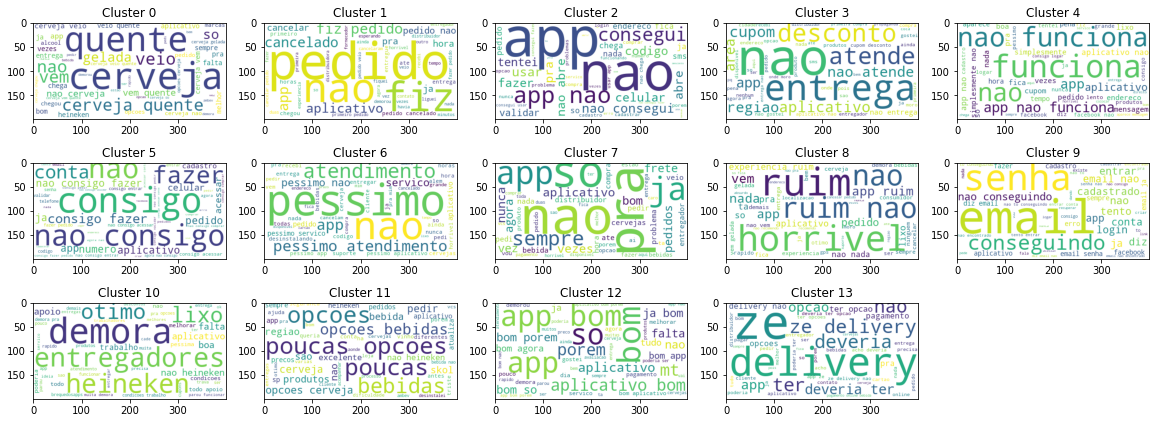

In [63]:
mw = 50

fig = plt.figure(figsize = (20, 15))
vocabulary.append('')

i = 0
for r in model.cluster_centers_:
    dictionary = { vocabulary[k]: r[k] for k in np.argsort(r)[::-1][:mw] }
    dictionary = {k: v for k, v in dictionary.items() if v > 0}

    wc = WordCloud(background_color='white', max_words=mw, relative_scaling=0.1, normalize_plurals=True)
    image = wc.generate_from_frequencies(dictionary)

    ax = fig.add_subplot(6, 5, (i + 1))
    plt.imshow(image)
    ax.set_title(f'Cluster {i}')
    i = i + 1

## Melhores exemplos

In [64]:
def sort_best_binds(key):
    # calculate similarities
    similarities = []
    centroid = model.cluster_centers_[key]
    for v in vectorized:
        similarities.append(cosine_similarity([centroid], v))

    # best binds
    indexes = np.array([s[0][0] for s in similarities])
    indexes = np.argsort(indexes)[::-1]
    
    return indexes

## Top N exemplos

In [65]:
topn = 15

for i in range(len(model.cluster_centers_)):
    indexes = sort_best_binds(i)
    values = df.iloc[indexes[:topn]].review_lematized.values
    print(f'\nCluster: {i}')
    for v in range(topn):
        print(values[v][:200])


Cluster: 0
['cerveja', 'amassada']
['cerveja', 'quente']
['cerveja', 'quente']
['cerveja', 'quente']
['cerveja', 'quente']
['cerveja', 'quente']
['cerveja', 'quente', 'so', 'resfriada']
['cerveja', 'quente', 'pra', 'carvalho']
['vezes', 'galera', 'distribue', 'manda', 'cerveja', 'quente', 'carioca', 'gosta', 'cerveja', 'gelada']
['pedi', 'cerveja', 'veio', 'quente', 'app', 'outro', 'app', 'vem', 'saco', 'gelo', 'veio', 'sacolinha', 'plastico', 'hora', 'abri', 'cerveja', 'fez', 'espuma', 'cerveja', 'quente']
['nao', 'boa', 'cunhado', 'passamos', 'mal', 'cerveja', 'olhar', 'cervejeiro', 'puro', 'olhar', 'cerveja', 'quente', 'parceria', 'chocar']
['acabei', 'baixar', 'app', 'indicaram', 'gostei', 'cerveja', 'veio', 'quente', 'divulgando', 'cerveja', 'gelada', 'entao', 'bora', 'cklocar', 'cerveja', 'pra', 'gelar']
['quaoidade', 'entrega', 'pessima', 'tempo', 'entrega', 'superior', '01:30', 'cerveja', 'quente', 'apos', 'comunicar', 'cerveja', 'quente', 'queria', 'trocaram', 'cerveja', 'que


Cluster: 8
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']
['ruim']

Cluster: 9
['nao', 'conseguindo', 'entra', 'sempre', 'senha', 'errada', 'pra', 'redefini', 'senha', 'q', 'nao', 'encontrou', 'email']
['nao', 'conseguindo', 'entrar', 'app', 'coloco', 'email', 'senha', 'diz', 'email', 'senha', 'estar', 'errado', 'sendo', 'ja', 'redefinir', 'senha', 'assim', 'nao', 'estar', 'entrando']
['senha', 'email', 'nao', 'funcionam']
['nao', 'conseguindo', 'logar', 'tento', 'fazer', 'novo', 'cadastro', 'informa', 'email', 'ja', 'cadastrado', 'vou', 'recuperar', 'senha', 'nao', 'encontra', 'email']
['impossivel', 'fazer', 'cadastro', 'coloco', 'email', 'diz', 'ja', 'cadastro', 'tento', 'alterar', 'senha', 'diz', 'email', 'nao', 'encontrado', 'tento', 'cadastrar', 'outro', 'email', 'diz', 'email'
['fiz', 'conta', 'usando', 'facebook', 'recentemente', 'desativei', 'tentar', 'entrar', 'nao', 'consigo', 'tento', 'recuperar

## Categorias

In [66]:
maps = {
    0: 'cerveja',
    1: 'pedido',
    2: 'aplicativo',
    3: 'desconhecido',
    4: 'nao funciona',
    5: 'nao consigo',
    6: 'pessimo',
    7: 'aplicativo',
    8: 'avaliacao ruim',
    9: 'nao consigo',
    10: 'todo apoio entregadores',
    11: 'poucas opcoes',
    12: 'bom',
    13: 'desconhecido'}

## Categorizar agrupamento

In [67]:
top_binds = 50

for key in maps:
    if maps[key]:
        
        # best binds
        indexes = sort_best_binds(key)

        # labeling records
        df['category'].iloc[indexes[:top_binds]] = maps[key]
        df.groupby(['category'])['author'].count()

/home/gomes/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/gomes/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/gomes/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [68]:
df.groupby(['category'])['author'].count().sort_values(ascending=False)

category
Outro                      8163
nao consigo                99  
desconhecido               99  
aplicativo                 83  
todo apoio entregadores    50  
poucas opcoes              50  
pessimo                    50  
nao funciona               50  
cerveja                    50  
bom                        50  
avaliacao ruim             50  
pedido                     47  
Name: author, dtype: int64

In [69]:
df[~df['category'].isin(['Outro'])].to_csv(f'{refined}/data_labeled.csv', sep=',', encoding='utf-8', index=False)